Editing Kevin's code to work for us, this ipynb shows the process (or a truncated version) of how I got the wavelength solution. Outputs the wavelength solution as a txt file, which can be used in all of our calibrated photos

In [1]:
import numpy as np
from astropy.io import fits
from scipy.ndimage import rotate
import matplotlib.pyplot as plt
from astropy.convolution import convolve, Box1DKernel
from specutils.manipulation import box_smooth
import pandas as pd
import glob
import sys

pathname = "/Users/Kalvyn/Desktop/Obs2/APO_Data/"

In [2]:
stdfiles = glob.glob(pathname+"std*.R.fits")
std_dat = glob.glob(pathname+"std*.dat")

df = pd.read_csv(std_dat[0],delimiter='\s+',names=["Angstroms","Flux"])
df

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Kalvyn\AppData\Local\Temp\ipykernel_29828\209274319.py:4: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(std_dat[0],delimiter='\s+',names=["Angstroms","Flux"])


,Angstroms,Flux
0,1140.6,8.792750e-12
1,1141.6,1.015690e-11
2,1142.6,9.614450e-12
3,1143.6,8.984610e-12
4,1144.6,8.923840e-12
...,...,...
3751,10225.0,7.385700e-15
3752,10229.9,7.400500e-15
3753,10234.8,7.541600e-15
3754,10239.6,7.291100e-15


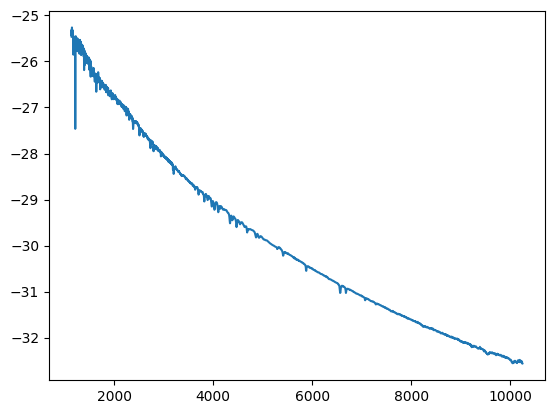

In [3]:
plt.plot(df["Angstroms"],np.log(df["Flux"]));

In [4]:
print(stdfiles)

['/Users/Kalvyn/Desktop/Obs2/APO_Data\\std_hz44.0001b.C.B.D.F.R.fits']


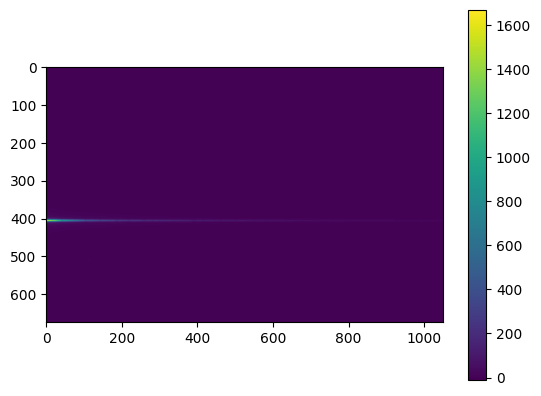

In [5]:
std = fits.open(stdfiles[0])
std_data = std[0].data
plt.imshow(std_data)
plt.colorbar()

In [6]:
argmax_array = np.array([])
y,x = std_data.shape
for i in range(x):
    argmax_array = np.append(argmax_array, np.argmax(std_data[:,i]))
median = int(np.median(argmax_array))

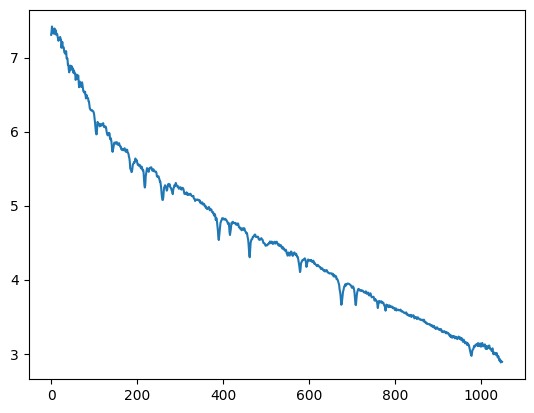

In [7]:
plt.plot(np.log(std_data[median,:]))

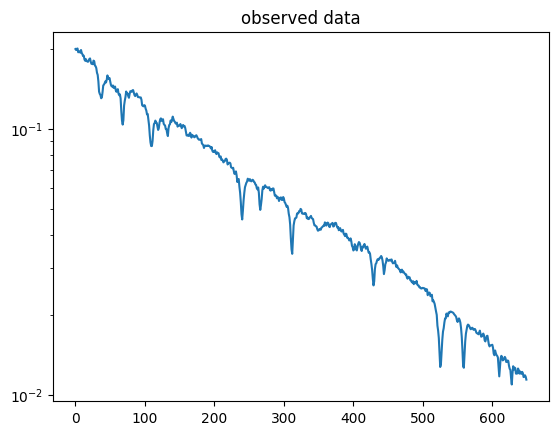

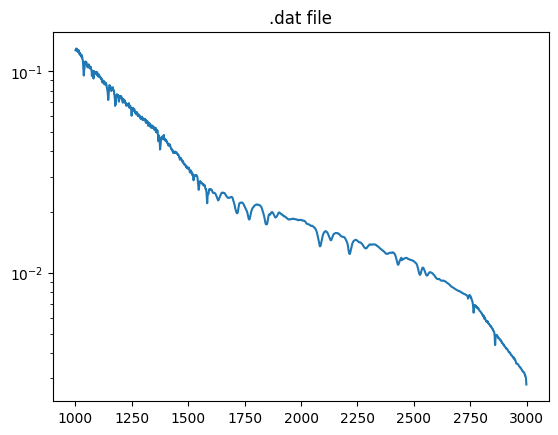

In [8]:
data = std_data[median,:]
dat = df["Flux"]
data = (data-np.min(data))/(np.max(data)-np.min(data))
dat = (dat-np.min(dat))/(np.max(dat)-np.min(dat))
plt.plot(data[150:800])
plt.yscale('log')
plt.title("observed data")
plt.show()
plt.plot(dat[1000:3000])
plt.yscale('log')
plt.title(".dat file");

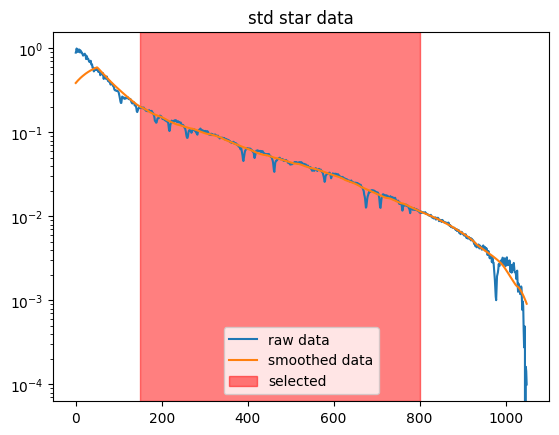

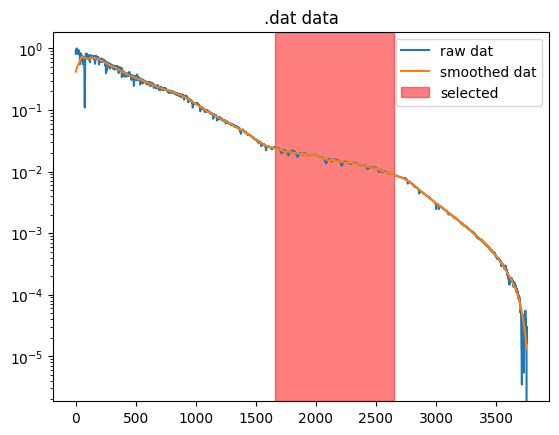

In [9]:
data_smooth = convolve(data, Box1DKernel(100))
dat_smooth = convolve(dat, Box1DKernel(100))
plt.plot(data,label="raw data")
plt.plot(data_smooth,label="smoothed data")
plt.axvspan(150, 800, color='red', alpha=0.5,label="selected")
plt.yscale('log')
plt.title("std star data")
plt.legend()
plt.show()
plt.plot(dat,label="raw dat")
plt.plot(dat_smooth,label="smoothed dat")
plt.yscale('log')
plt.axvspan(1660, 2650, color='red', alpha=0.5,label="selected")
plt.legend()
plt.title(".dat data");

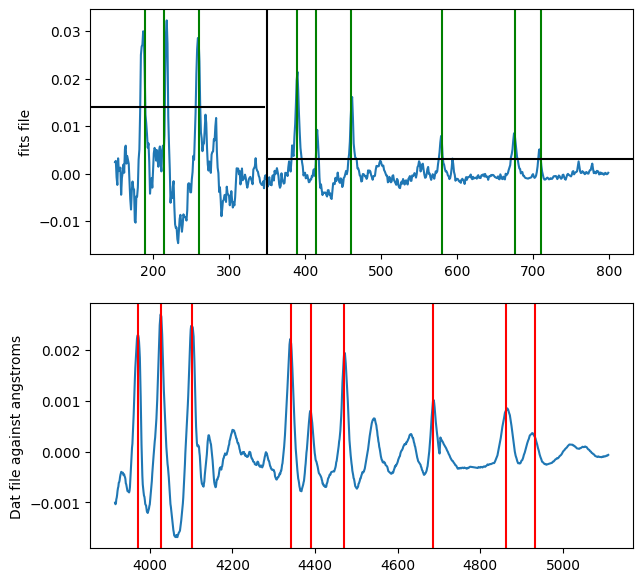

In [10]:
data_new = (data-data_smooth)*-1
dat_new = (dat-dat_smooth)*-1
fix, ax = plt.subplots(2,figsize=(7,7))
ax[0].plot(np.arange(150,800),data_new[150:800])
ax[0].axvline(190,color='green')#
ax[0].axvline(215,color='green')#
ax[0].axvline(260,color='green')#
ax[0].axvline(390,color='green')#
ax[0].axvline(415,color='green')#
ax[0].axvline(460,color='green')#
# ax[0].axvline(500,color='green')##
# ax[0].axvline(550,color='green')##
ax[0].axvline(580,color='green')#
# ax[0].axvline(595,color='green')#
ax[0].axvline(676,color='green')#
ax[0].axvline(710,color='green')#
ax[0].axhline(0.014,0,0.32,color="black")
ax[0].axhline(0.0030,0.33,1,color="black")
ax[0].axvline(350,color="black")
ax[0].set_ylabel("fits file")

ax[1].plot(df['Angstroms'][1660:2650],dat_new[1660:2650]);
# ax[1].plot(dat_new[1660:2650]);
ax[1].axvline(df["Angstroms"][1715],color='red')#
ax[1].axvline(df["Angstroms"][1770],color='red')#
ax[1].axvline(df["Angstroms"][1845],color='red')#
ax[1].axvline(df["Angstroms"][2085],color='red')#
ax[1].axvline(df["Angstroms"][2135],color='red')#
ax[1].axvline(df["Angstroms"][2215],color='red')#
# ax[1].axvline(df["Angstroms"][2285],color='red')#
# ax[1].axvline(df["Angstroms"][2370],color='red')#
ax[1].axvline(df["Angstroms"][2430],color='red')#
# ax[1].axvline(df["Angstroms"][2450],color='red')#
ax[1].axvline(df["Angstroms"][2525],color='red')#
ax[1].axvline(df["Angstroms"][2560],color='red')
ax[1].set_ylabel("Dat file against angstroms");

In [11]:
print("190 = ",df["Angstroms"][1715])
print("215 = ",df["Angstroms"][1770])
print("260 = ",df["Angstroms"][1845])
print("390 = ",df["Angstroms"][2085])
print("415 = ",df["Angstroms"][2135])
print("460 = ",df["Angstroms"][2215])
# print("500 = ",df["Angstroms"][2285])
# print("550 = ",df["Angstroms"][2370])
print("580 = ",df["Angstroms"][2430])
# print("595 = ",df["Angstroms"][2450])
print("676 = ",df["Angstroms"][2525])
print("710 = ",df["Angstroms"][2560])

190 =  3971.12
215 =  4026.14
260 =  4101.16
390 =  4341.22
415 =  4391.23
460 =  4471.25
580 =  4686.31
676 =  4861.36
710 =  4931.38


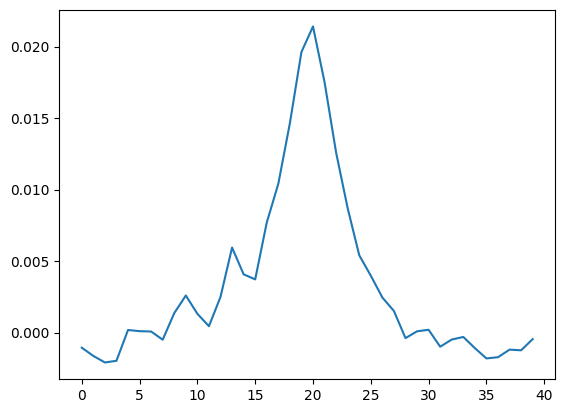

In [12]:
from astropy.modeling import models, fitting
plt.plot(data_new[370:410])

In [13]:
fitfunc = fitting.LevMarLSQFitter()

testline = data_new[370:410] # edited
testx = np.arange(len(testline)) + 370 #edited
test_model = models.Gaussian1D(amplitude=testline.max(),mean=np.median(testx),stddev=np.std(testx)) + models.Const1D(amplitude=testline.min())
test_fit = fitfunc(test_model, testx, testline)

arcwidth = test_fit[0].stddev.value
offset = test_fit[1].amplitude.value
window = int(4*test_fit[0].stddev.value)  # line fitting window

In [14]:
#line near 190 correpsonds to 3971.12

line0 = data_new[190-window:190+window+1]
x0 = np.arange(len(line0)) + 190-window 
line_model0 = models.Gaussian1D(amplitude=line0.max(),mean=np.median(x0),stddev=arcwidth) + models.Const1D(amplitude=offset)
line_fit0 = fitfunc(line_model0, x0, line0)

#line near 710 correpsonds to 4931.38

line1 = data_new[710-window:710+window+1]
x1 = np.arange(len(line1)) + 710 - window 
line_model1 = models.Gaussian1D(amplitude=line1.max(),mean=np.median(x1),stddev=arcwidth) + models.Const1D(amplitude=offset)
line_fit1 = fitfunc(line_model1, x1, line1)

disp0 = (4931.38 - 3971.12) / (line_model1[0].mean.value - line_model0[0].mean.value)

wavsol0 = models.Linear1D(slope=disp0,intercept=-disp0*line_model0[0].mean.value + 3971.12)

[ 34  35  36  37  38  39  66  67  68  69 107 108 109 110 111 112 233 234
 235 236 237 238 239 240 241 242 243 244 245 265 266 267 268 308 309 310
 311 312 313 314 315 316 427 428 429 430 431 521 522 523 524 525 526 527
 528 529 558 559 560]
[ 0  6 10 16 29 33 42 47 56 -1]
[186 217 259 388 416 461 578 674 708]
[3971.12 4026.14 4101.16 4341.22 4391.23 4471.25 4686.31 4711.32 4861.36
 4931.38]
[3965.38224719 4022.30655303 4098.90460806 4339.96932152 4388.49829806
 4472.62145521 4689.26067313 4867.38891078 4928.69431153]


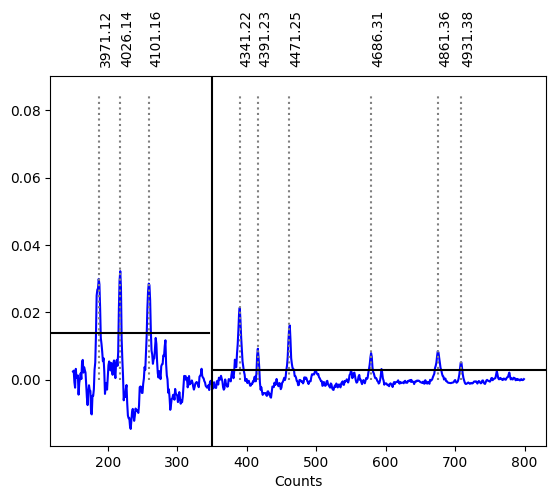

In [15]:
# lineselect = np.array([df['Angstroms'][1715],df['Angstroms'][1770],df['Angstroms'][1845],df['Angstroms'][2085]\
#                       ,df['Angstroms'][2135],df['Angstroms'][2215],df['Angstroms'][2285],df['Angstroms'][2370]\
#                       ,df['Angstroms'][2430],df['Angstroms'][2450],df['Angstroms'][2525],df['Angstroms'][2560]])
lineselect = np.array([df['Angstroms'][1715],df['Angstroms'][1770],df['Angstroms'][1845],df['Angstroms'][2085]\
                      ,df['Angstroms'][2135],df['Angstroms'][2215]\
                      ,df['Angstroms'][2430],df['Angstroms'][2450],df['Angstroms'][2525],df['Angstroms'][2560]]) # edited
px = np.arange(150,800)
thresh1 = 0.014 # edited
thresh2 = 0.0034
#finding lines to fit -- examine this closely to understand how this works
index1 = np.where(data_new[150:350] > thresh1)[0]
index2 = np.where(data_new[350:800] > thresh2)[0]+200
# print(index1,index2)
# index = np.where(data_new[150:800] > thresh)[0] # edited
index = np.concatenate((index1,index2),axis=None)
# print(index)
ii = np.where(np.diff(index) > 1)[0]+1
ii = np.append(0,ii)
numlines = len(ii)
ii = np.append(ii,-1)
print(index)
print(ii)
pxcen0 = []

figB, axB = plt.subplots()

for k in range(1,numlines+1):
    # print("ii: ",ii[k-1],ii[k])
    # print("index: ",index[ii[k-1]],index[ii[k]-1])
    # print("graph: ",index[ii[k-1]]+150,index[ii[k]-1]+150)
    # axB.axvspan(index[ii[k-1]]+150,index[ii[k]-1]+150, color='red', alpha=0.5)
    temp = int( np.median( index[ii[k-1]:ii[k]-1]) )
    pxcen0.append(temp+150)

# pxcen0.append(int(np.median(index[ii[-1]:])) )
pxcen0 = np.array(pxcen0).flatten()
print(pxcen0)

pxcen = np.zeros(len(pxcen0))  # initialize array to contain fitted line centers

for k in range(len(pxcen0)):
    testline = data_new[pxcen0[k]-window:pxcen0[k]+window+1]
    testx = np.arange(len(testline)) + pxcen0[k]-window
    test_model = models.Gaussian1D(amplitude=testline.max(),mean=np.median(testx),stddev=arcwidth) + models.Const1D(amplitude=offset)
    test_fit = fitfunc(test_model, testx, testline)
    
    pxcen[k] = test_fit[0].mean.value

# print(pxcen)
## need to match up lines in database to the pixel centroids in `pxcen' ; this will work better if wavsol0 uses multple lines not just 2, adjust manually
lcen_init = wavsol0(pxcen)

wavarray = np.zeros(len(pxcen))
# print(lineselect)
# lineselect = linedatabase.copy() # edited

print(lineselect)
print(lcen_init)
for k in range(len(lcen_init)):
    idiff = np.abs(lineselect - lcen_init[k]).argmin()
    wavarray[k] = lineselect[idiff]
    lineselect = np.delete(lineselect,idiff)

# print(wavarray)

axB.plot(px,data_new[150:800],'b',markersize=1)

axB.vlines(pxcen,0,data_new.max(),linestyles=':',color='gray')    

for i in range(len(wavarray)):
    axB.text(pxcen[i],data_new.max()*1.1,"{0}".format(wavarray[i]),rotation=90)


axB.set_xlabel("Pixel Position")
axB.set_xlabel("Counts")
axB.axhline(0.014,0,0.32,color="black")
axB.axhline(0.003,0.33,1,color="black")
# axB.axhline(0.0034,color='black')
axB.axvline(350,color="black")
# axB.set_xlim(150+200,150+600)

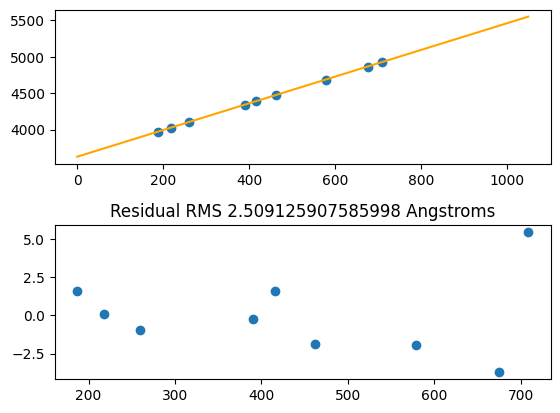

In [16]:
nx = len(data_new)
coef1 = np.polyfit(pxcen,wavarray,1)
wfun1 = np.poly1d(coef1)
dummyx = np.arange(nx) # edited

resid1 = wavarray - wfun1(pxcen)

fig01, ax01 = plt.subplots(nrows=2)

ax01[0].plot(pxcen,wavarray,'o')
ax01[0].plot(dummyx,wfun1(dummyx),color='orange')

ax01[1].plot(pxcen,resid1,'o')

ax01[1].set_title("Residual RMS {0} Angstroms".format(np.std(resid1) ) )
fig01.subplots_adjust(hspace=0.4)

In [17]:
print(f"{coef1[0]}x + {coef1[1]}")
f = open("wave_sol.txt", "w")
f.write("wavelength solution:\n")
f.write(f"{coef1[0]}x + {coef1[1]}")
f.close()

1.833419786761195x + 3626.8864364718015


1050
407


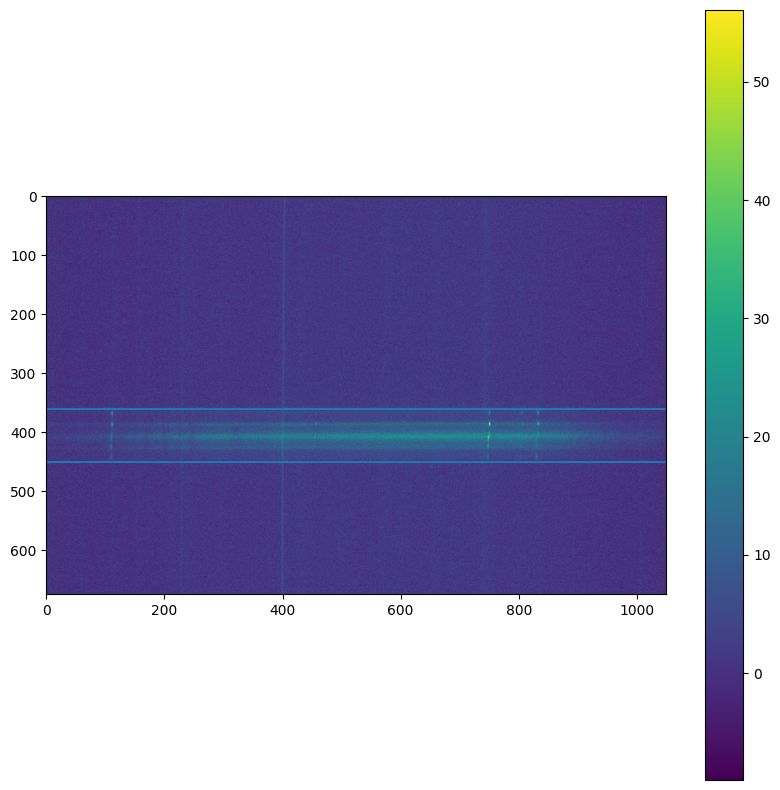

In [18]:
trial = fits.open("/Users/Kalvyn/Desktop/Obs2/APO_Data/galspec_N2.0023b.C.B.D.R.fits")
data = trial[0].data
plt.figure(figsize=(10,10))
plt.imshow(data)
plt.axhline(360)
plt.axhline(450)
plt.colorbar();
arg_y_array = np.array([])
print(data.shape[1])
for i in range(data.shape[1]):
    arg_y = np.argmax(data[:,i])
    arg_y_array = np.append(arg_y_array, arg_y)
argy = int(np.median(arg_y_array))
print(argy)

In [19]:
coef4 = np.polyfit(pxcen,wavarray,1)
wfun4 = np.poly1d(coef4)
coef2 = np.polyfit(pxcen,wavarray,2)
wfun2 = np.poly1d(coef2)

## Line 1

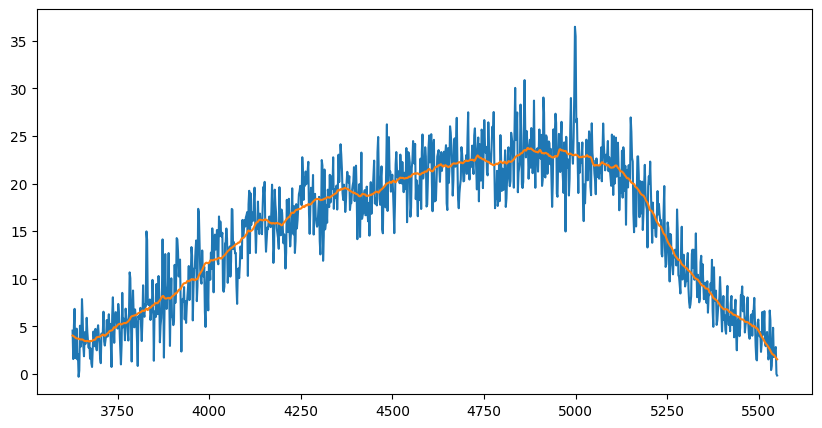

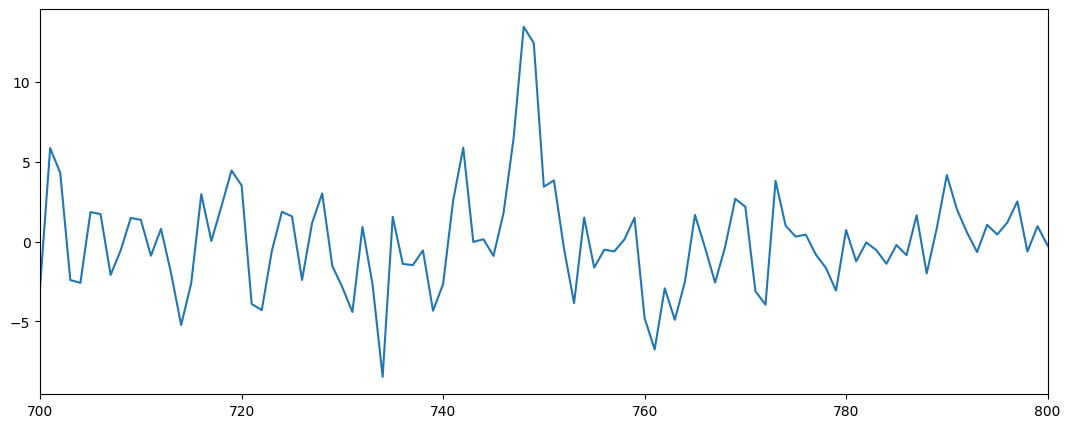

In [20]:
coef1 = 3626.886436471805
coef0 = 1.8334197867611897
rangee = np.arange(data.shape[1])
waves = coef0*rangee+coef1
data_smooth = convolve(data[argy,:], Box1DKernel(50),boundary='extend')
data_new = data[argy,:]-data_smooth
plt.figure(figsize=(10,5))
plt.plot(wfun4(rangee),data[argy,:])
plt.plot(wfun4(rangee),data_smooth)
plt.show()
plt.figure(figsize=(13,5))
plt.plot(rangee,data_new)
# plt.xlim(4800,5100)
plt.xlim(700,800)
max_val = []
argmax = []
gaus_peak = []
gaus_val = []
for i in range(360,450):
    data_smooth = convolve(data[i,:], Box1DKernel(50),boundary='extend')
    data_new = data[i,:]-data_smooth
    testline = data_new[730:770]
    testx = np.arange(len(testline))+730
    test_model = models.Gaussian1D(amplitude=testline.max(),mean=np.median(testx),stddev=np.std(testx)) + models.Const1D(amplitude=testline.min())
    test_fit = fitfunc(test_model, testx, testline)
    max_val.append(np.max(data_new[700:800]))
    argmax.append(np.argmax(data_new[700:800])+700)
    gaus_peak.append(test_fit[0].mean.value)
    gaus_val.append(test_fit[0].amplitude.value)
    # plt.plot(testline,'k-') # Checking Plotting
    # plt.plot(test_fit(testx),'r--')
    # plt.show()

max_val = np.array(max_val)
argmax = np.array(argmax)
gaus_val = np.array(gaus_val)
gaus_peak = np.array(gaus_peak)
indeces = np.arange(360,450)-408
# plt.ylim(-0.5,0.5)
# plt.axvline(waves[np.argmax(data_new[700:800])+700],label=waves[np.argmax(data_new[700:800])+700],color="red")
# plt.legend()

In [21]:
# print(max_val,argmax)
print(gaus_val,gaus_peak)

[ 1.29623962e+00  1.29734718e+02  4.75346857e+00  7.75618476e+00
  6.38566342e+00  8.41679175e+00  1.47338826e+01  1.91215252e+01
  2.24766036e+01  1.68422377e+01  1.12456264e+01  5.30562801e+00
  4.04295530e+00  3.09725888e+00  7.41278634e+01  1.67321508e+00
  2.17412350e+00  3.01552730e+02  3.54119817e+01  3.05273353e+00
  4.10410029e+00  2.50910264e+00  8.17298701e+00  1.46326660e+01
  2.87312632e+01  4.17889869e+01  4.47196493e+01  3.81809406e+01
  3.90509411e+01  2.26182893e+01  1.54465003e+01  9.64176259e+00
  2.99045664e+00  3.39093138e+00  2.63347517e+00 -1.59002032e+00
  1.90348591e+00  1.06564545e-01 -1.82053273e+02  2.98303958e+00
  1.07736362e+01  1.37763518e+01  1.29118963e+01  1.04015222e+01
  1.60786311e+01  5.57925410e+01  1.83237796e+01  1.47637870e+01
  2.66387822e+01  2.16906987e+01  2.38024881e+01  2.31237850e+01
  1.91354284e+01  1.70269231e+01  1.53434941e+01  1.05362383e+01
  1.16875061e+01  4.42147054e+00 -4.33127149e-01  3.40983653e+00
  2.70363633e+00  8.05435

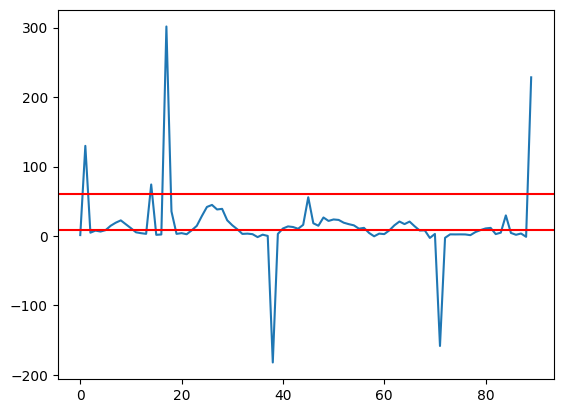

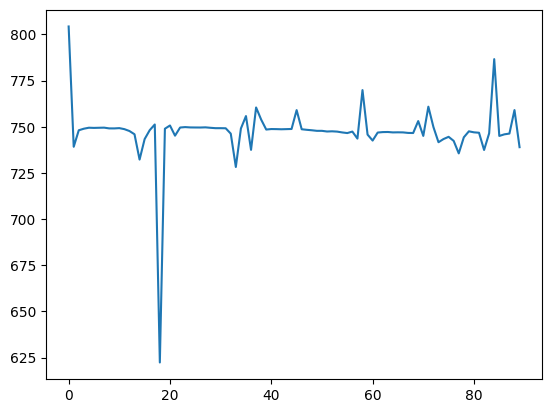

In [22]:
# plt.plot(max_val)
# plt.axhline(8)
# plt.show()
# plt.plot(argmax);
plt.plot(gaus_val)
plt.axhline(8,color="red")
plt.axhline(60,color="red")
plt.show()
plt.plot(gaus_peak);

[         nan          nan          nan          nan          nan
 749.41395628 749.48593543 749.54976467 749.15393908 749.14000568
 749.29428102          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan 749.6177279  749.84766214 749.67310673
 749.6412641  749.62226693 749.71523759 749.46716365 749.26794308
 749.26862009 749.21212602          nan          nan          nan
          nan          nan          nan          nan          nan
 748.79338105 748.75566081 748.67459493 748.75193334 748.83323555
          nan 748.68239562 748.38122767 748.13386362 747.82356571
 747.82341849 747.46430232 747.56886071 747.4071274  746.95733186
 746.61894157 747.4260827           nan          nan          nan
          nan 746.89964449 747.14392376 747.19845182 746.97704749
 747.02467229 746.97980481          nan 746.63897459          nan
          nan          nan          nan          nan          nan
          

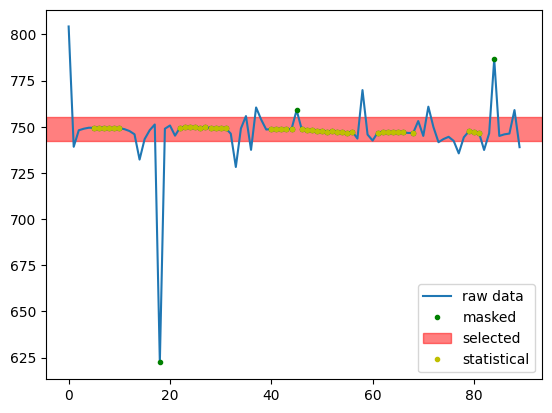

In [23]:
values = np.where((gaus_val>=8) & (gaus_val<=60),gaus_peak,np.NaN)
center = np.nanmedian(values)
std = np.nanstd(values)
plt.plot(gaus_peak,label="raw data")
plt.plot(values,'g.',label="masked")
plt.axhspan(center+std/3,center-std/3, color='red', alpha=0.5,label="selected")
values2 = np.where((values>=center-std/3)&(values<=center+std/3),values,np.NaN)
center = np.nanmedian(values2)
print(values2)
print(center)
plt.plot(values2,'y.',label="statistical")
plt.legend();

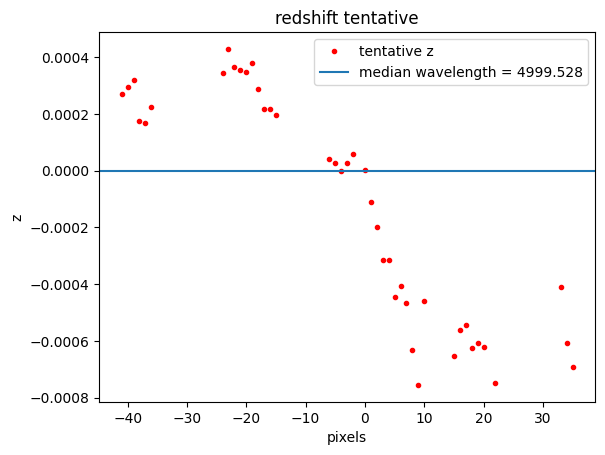

In [24]:
z = (wfun4(values2)-wfun4(center))/wfun4(center)
center_ind = np.where(np.abs(z)==np.nanmin(np.abs(z)))[0]
# print(center_ind)
# print(center)
z_ind = np.arange(len(z))-center_ind
# print(z_ind)
plt.plot(z_ind,z,'r.',label="tentative z")
# plt.axhline(wfun4(center),label=f"center (median) wavelength = {wfun4(center):.3f}")
plt.axhline(0,label=f"median wavelength = {wfun4(center):.3f}")
plt.xlabel("pixels")
plt.ylabel("z")
plt.title("redshift tentative")
plt.legend()

## Line 2

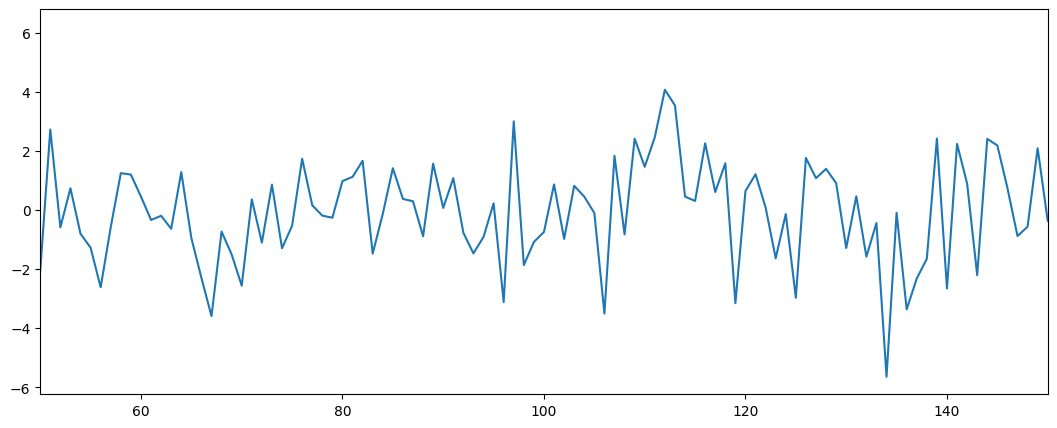

In [25]:
plt.figure(figsize=(13,5))
plt.plot(rangee,data_new)
# plt.xlim(4800,5100)
plt.xlim(50,150)
max_val = []
argmax = []
gaus_peak = []
gaus_val = []
for i in range(360,450):
    data_smooth = convolve(data[i,:], Box1DKernel(50),boundary='extend')
    data_new = data[i,:]-data_smooth
    testline = data_new[90:130]
    testx = np.arange(len(testline))+90
    test_model = models.Gaussian1D(amplitude=testline.max(),mean=np.median(testx),stddev=np.std(testx)) + models.Const1D(amplitude=testline.min())
    test_fit = fitfunc(test_model, testx, testline)
    max_val.append(np.max(data_new[50:150]))
    argmax.append(np.argmax(data_new[50:150])+50)
    gaus_peak.append(test_fit[0].mean.value)
    gaus_val.append(test_fit[0].amplitude.value)
    # plt.plot(testline,'k-') # checking gaussians
    # plt.plot(test_fit(testx),'r--')
    # plt.show()

max_val = np.array(max_val)
argmax = np.array(argmax)
gaus_val = np.array(gaus_val)
gaus_peak = np.array(gaus_peak)

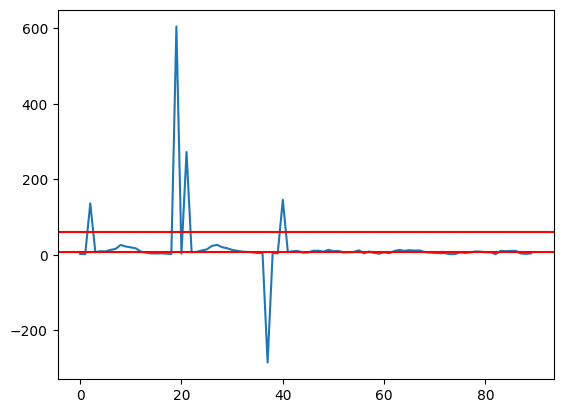

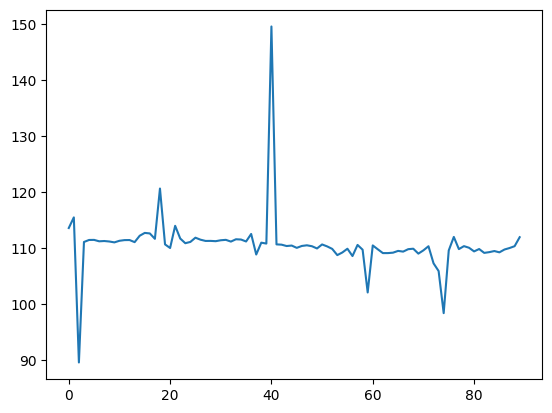

In [26]:
plt.plot(gaus_val)
plt.axhline(8,color="red")
plt.axhline(60,color="red")
plt.show()
plt.plot(gaus_peak);

[         nan          nan          nan          nan 111.42057966
 111.43613725 111.18269821 111.23435963 111.14795787 110.98911973
 111.27571016 111.39646126 111.4083599           nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan 111.07063811
 111.82929141 111.47151872 111.24798817 111.25508711 111.20495624
 111.36928589 111.4436265  111.13193961          nan          nan
          nan          nan          nan          nan          nan
          nan          nan 110.58267347 110.33671375          nan
          nan 110.35059855 110.46835703 110.30076187 109.90348765
 110.62011756 110.27042045          nan          nan          nan
 109.85509616          nan 110.53282111          nan          nan
          nan          nan 109.07296977 109.07476324 109.1509181
 109.46519148 109.33922232 109.7745706           nan          nan
          nan          nan          nan          nan          nan
          n

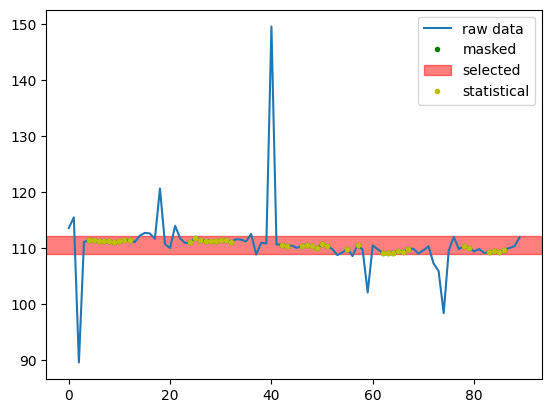

In [27]:
values = np.where((gaus_val>=8) & (gaus_val<=60),gaus_peak,np.NaN)
center = np.nanmedian(values)
std = np.nanstd(values)
plt.plot(gaus_peak,label="raw data")
plt.plot(values,'g.',label="masked")
plt.axhspan(center+2*std,center-2*std, color='red', alpha=0.5,label="selected")
values2 = np.where((values>=center-2*std)&(values<=center+2*std),values,np.NaN)
center = np.nanmedian(values2)
print(values2)
print(center)
plt.plot(values2,'y.',label="statistical")
plt.legend();

[            nan             nan             nan             nan
  4.13082322e-04  4.20530543e-04  2.99196209e-04  3.23929195e-04
  2.82564220e-04  2.06520216e-04  3.43725823e-04  4.01535598e-04
  4.07232089e-04             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
  2.45547269e-04  6.08753697e-04  4.37469474e-04  3.30453879e-04
  3.33852508e-04  3.09852280e-04  3.88525350e-04  4.24116028e-04
  2.74895452e-04             nan             nan             nan
             nan             nan             nan             nan
             nan             nan  1.19334469e-05 -1.05820146e-04
             nan             nan -9.91727785e-05 -4.27957238e-05
 -1.23032165e-04 -3.13227805e-04  2.98598632e-05 -1.37558166e-04
             nan             nan             nan -3.36395307e-04
             nan -1.19334469e-05             nan             nan
             nan         

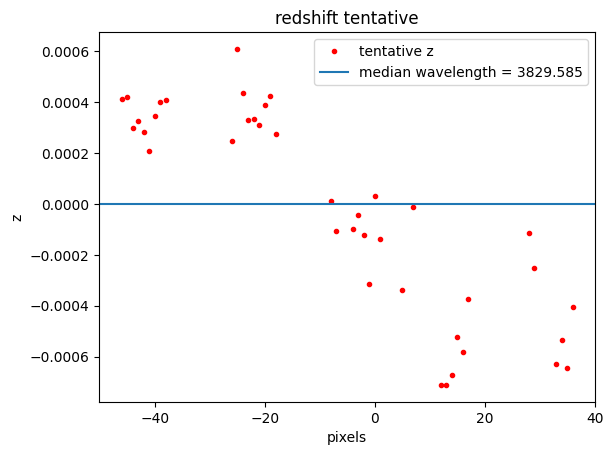

In [28]:
z2 = (wfun4(values2)-wfun4(center))/wfun4(center)
# center_ind2 = np.nanargmin(np.abs(z2))
center_ind2 = 50 # manual cause I can't get statistics to agree
print(z2,center_ind2)
z_ind2 = np.arange(len(z2))-center_ind2
# print(z_ind2)
z_tot = [z,z2]
z_ind_tot = [z_ind,z_ind2]
plt.plot(z_ind2,z2,'r.',label="tentative z")
# plt.axhline(wfun4(center),label=f"center (median) wavelength = {wfun4(center):.3f}")
plt.axhline(0,label=f"median wavelength = {wfun4(center):.3f}")
plt.xlabel("pixels")
plt.ylabel("z")
plt.title("redshift tentative")
plt.legend()
plt.show()

## Line 3

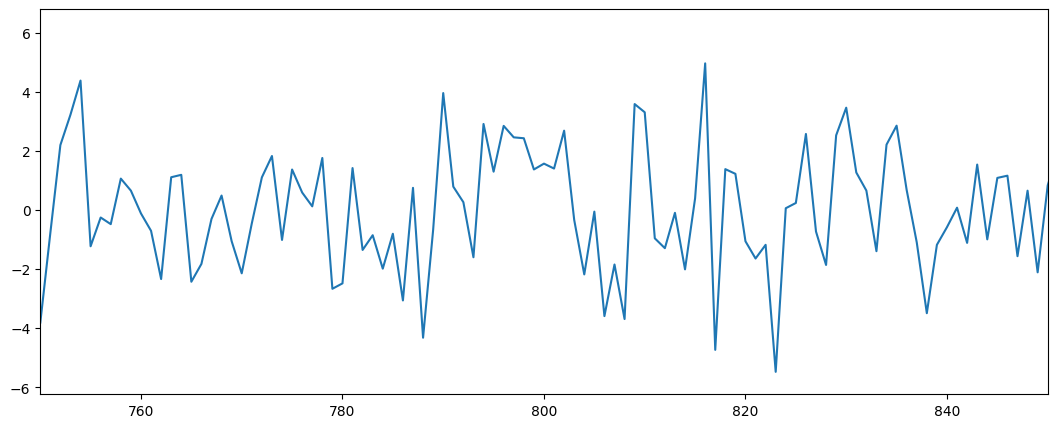

In [29]:
plt.figure(figsize=(13,5))
plt.plot(rangee,data_new)
# plt.xlim(4800,5100)
plt.xlim(750,850)
max_val = []
argmax = []
gaus_peak = []
gaus_val = []
for i in range(360,450):
    data_smooth = convolve(data[i,:], Box1DKernel(50),boundary='extend')
    data_new = data[i,:]-data_smooth
    testline = data_new[810:850]
    testx = np.arange(len(testline))+810
    test_model = models.Gaussian1D(amplitude=testline.max(),mean=np.median(testx),stddev=np.std(testx)) + models.Const1D(amplitude=testline.min())
    test_fit = fitfunc(test_model, testx, testline)
    max_val.append(np.max(data_new[810:850]))
    argmax.append(np.argmax(data_new[810:850])+810)
    gaus_peak.append(test_fit[0].mean.value)
    gaus_val.append(test_fit[0].amplitude.value)
    # plt.plot(testline,'k-') # checking gaussians
    # plt.plot(test_fit(testx),'r--')
    # plt.show()

max_val = np.array(max_val)
argmax = np.array(argmax)
gaus_val = np.array(gaus_val)
gaus_peak = np.array(gaus_peak)

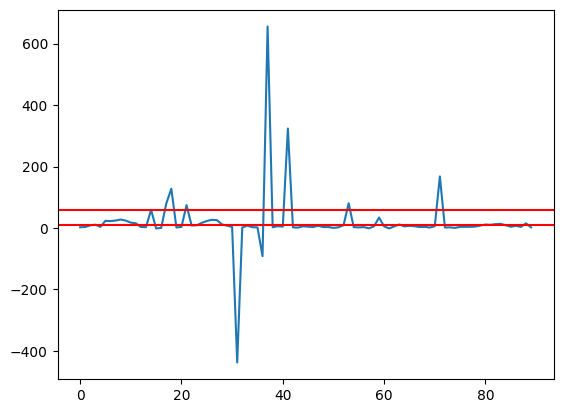

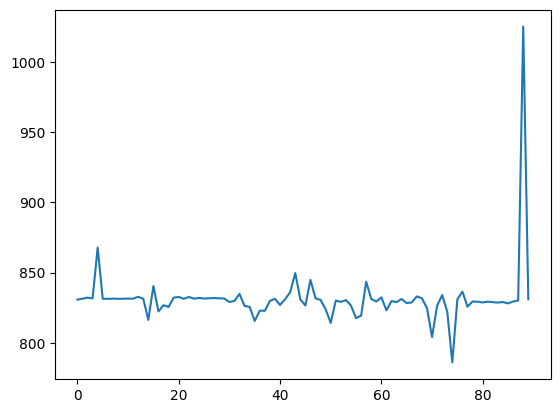

In [30]:
plt.plot(gaus_val)
plt.axhline(8,color="red")
plt.axhline(60,color="red")
plt.show()
plt.plot(gaus_peak);

[         nan          nan 832.20084836 831.62542097          nan
 831.39842603 831.35767373 831.49967245 831.35655148 831.42464239
 831.51611651 831.45754868          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan 831.48708602 831.9777794
 831.59545275 831.73101952 831.9189833  831.71956511          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan 829.171581            nan          nan
          nan          nan          nan          nan 829.4297072
          nan          nan          nan 829.04423822          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          na

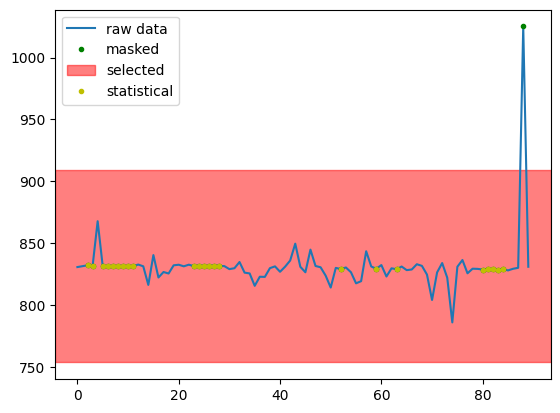

In [31]:
values = np.where((gaus_val>=8) & (gaus_val<=50),gaus_peak,np.NaN)
center = np.nanmedian(values)
std = np.nanstd(values)
plt.plot(gaus_peak,label="raw data")
plt.plot(values,'g.',label="masked")
plt.axhspan(center+2*std,center-2*std, color='red', alpha=0.5,label="selected")
values2 = np.where((values>=center-2*std)&(values<=center+2*std),values,np.NaN)
center = np.nanmean(values2)
print(values2)
print(center)
plt.plot(values2,'y.',label="statistical")
plt.legend();

[        nan         nan  0.00052323  0.00031837         nan  0.00023756
  0.00022305  0.00027361  0.00022265  0.00024689  0.00027946  0.00025861
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan  0.00026913
  0.00044381  0.0003077   0.00035597  0.00042288  0.00035189         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan -0.00055521         nan
         nan         nan         nan         nan         nan -0.00046331
         nan         nan         nan -0.00060054         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan -0.00069168 -0.00049276 -0

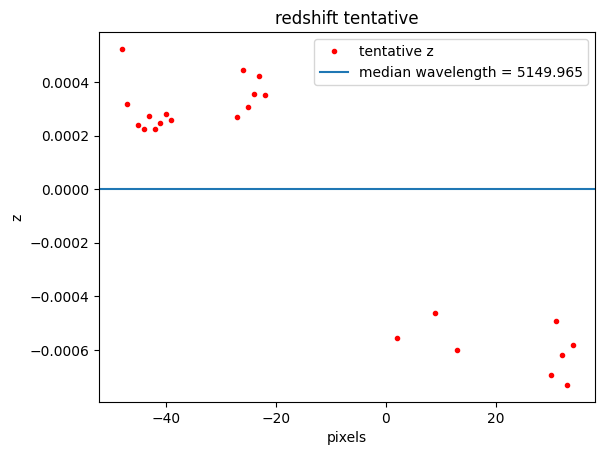

In [32]:
z3 = (wfun4(values2)-wfun4(center))/wfun4(center)
center_ind3 = np.nanargmin(np.abs(z3))
center_ind3 = 50
print(z3,center_ind3)
z_ind3 = np.arange(len(z3))-center_ind3
z_tot.append(z3)
z_ind_tot.append(z_ind3)
plt.plot(z_ind3,z3,'r.',label="tentative z")
# plt.axhline(wfun4(center),label=f"center (median) wavelength = {wfun4(center):.3f}")
plt.axhline(0,label=f"median wavelength = {wfun4(center):.3f}")
plt.xlabel("pixels")
plt.ylabel("z")
plt.title("redshift tentative")
plt.legend()
plt.show()

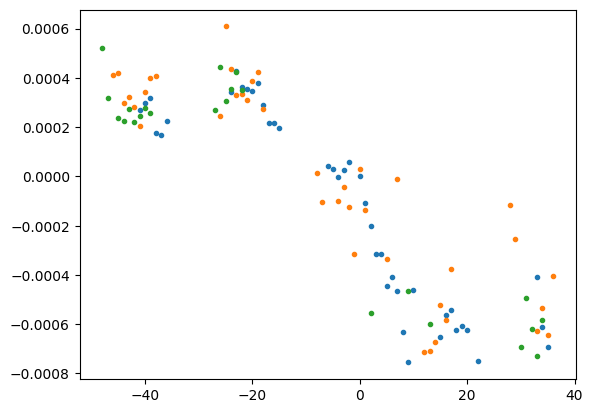

In [33]:
for i in range(3):
    plt.plot(z_ind_tot[i],z_tot[i],'.')

[ 2.69707191e-04  2.96103282e-04  3.19510648e-04  1.74354064e-04
  1.69244426e-04  2.25820055e-04  3.44434023e-04  4.28755173e-04
  3.64742467e-04  3.53065183e-04  3.46098570e-04  3.80192635e-04
  2.89219322e-04  2.16161442e-04  2.16409714e-04  1.95692294e-04
  4.21307446e-05  2.82980350e-05 -1.43032886e-06  2.69311024e-05
  5.67461291e-05  1.43032886e-06 -1.09013542e-04 -1.99726526e-04
 -3.13518524e-04 -3.13572513e-04 -4.45267075e-04 -4.06923574e-04
 -4.66234179e-04 -6.31182545e-04 -7.55276537e-04 -4.59282918e-04
 -6.52337573e-04 -5.62755834e-04 -5.42759383e-04 -6.23952458e-04
 -6.06487557e-04 -6.22941296e-04 -7.47930060e-04 -4.09321382e-04
 -6.09222500e-04 -6.92855890e-04  4.13082322e-04  4.20530543e-04
  2.99196209e-04  3.23929195e-04  2.82564220e-04  2.06520216e-04
  3.43725823e-04  4.01535598e-04  4.07232089e-04  2.45547269e-04
  6.08753697e-04  4.37469474e-04  3.30453879e-04  3.33852508e-04
  3.09852280e-04  3.88525350e-04  4.24116028e-04  2.74895452e-04
  1.19334469e-05 -1.05820

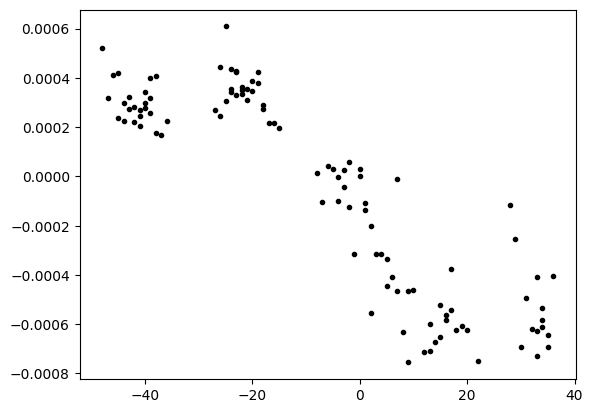

In [34]:
totality = np.array([])
totality_ind = np.array([])
for i in range(len(z_tot)):
    for j in range(len(z_tot[i])):
        # print(z_tot[i][j])
        if(np.isnan(z_tot[i][j]) == False):
            totality = np.append(totality, z_tot[i][j])
            totality_ind = np.append(totality_ind, z_ind_tot[i][j])
print(totality,totality_ind)
plt.plot(totality_ind,totality,'k.')

sorter = np.argsort(totality_ind)
totality = totality[sorter]
totality_ind = totality_ind[sorter]

database_sparsed = {"748 pix data":z_tot[0],"748 pix diff":z_ind_tot[0],\
            "110 pix data":z_tot[1],"110 pix diff":z_ind_tot[1],\
            "830 pix data":z_tot[2],"830 pix diff":z_ind_tot[2]}
df1 = pd.DataFrame(database_sparsed)

database_total = {"total data":totality,"total diff":totality_ind}
df2 = pd.DataFrame(database_total)

df1.to_csv("Data_Individual.csv",na_rep=np.nan)
df2.to_csv("Data_Total.csv")

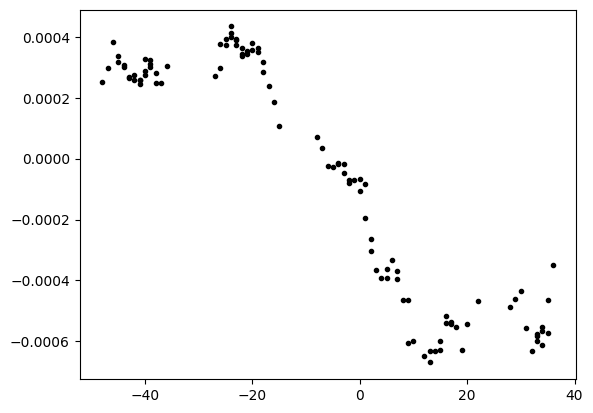

In [35]:
total_smoothed = convolve(totality,Box1DKernel(5))
plt.plot(totality_ind,total_smoothed,'k.')

$$z=\sqrt{\frac{c+v}{c-v}}-1$$

$$c(\frac{(z+1)^2-1}{(z+1)^2+1})=v$$

In [36]:
z_shift = (np.max(total_smoothed)+np.min(total_smoothed))/2
print(z_shift)

-0.00011777163265188476


Text(0, 0.5, 'Velocity km/s')

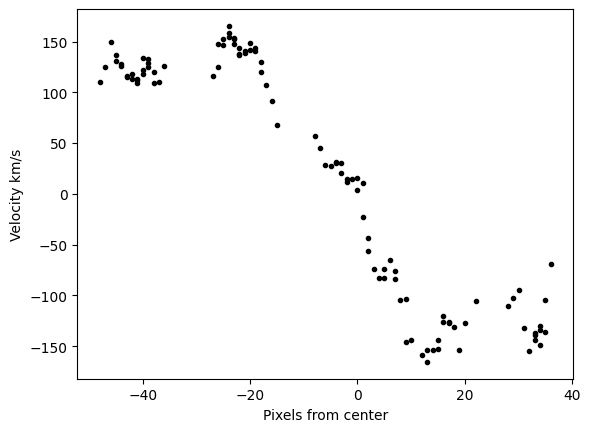

In [37]:
c = 2.998*10**8  #m/s
z = total_smoothed

totality-=z_shift
z-=z_shift
v = c*(((z+1)**2-1)/((z+1)**2+1))
raw = c*(((totality+1)**2-1)/((totality+1)**2+1))
plt.plot(totality_ind,v/1000,'k.')
plt.xlabel("Pixels from center")
plt.ylabel("Velocity km/s")

35.242036558652195


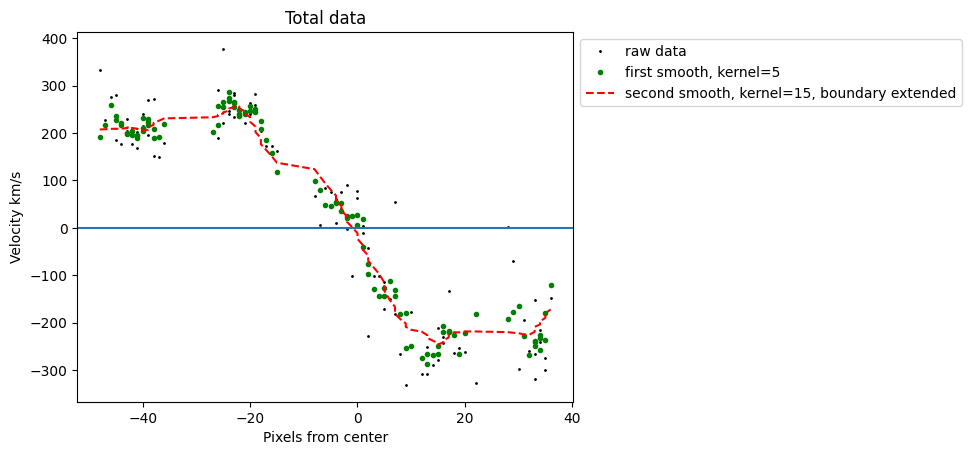

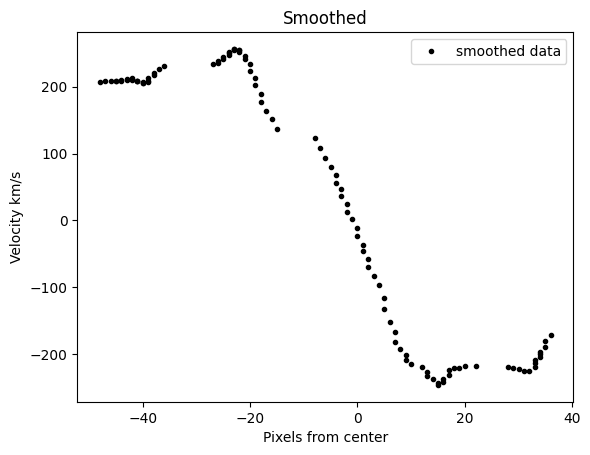

In [38]:
import math
M_axis = 2.76
m_axis = 1.95
i = math.atan(m_axis/M_axis)*180/np.pi # degrees
print(i)
v_correction = v/math.cos((90-i)*np.pi/180)
raw_correction = raw/math.cos((90-i)*np.pi/180)
v_corr_smooth = convolve(v_correction,Box1DKernel(15),boundary="extend")
plt.plot(totality_ind,raw_correction/1000,'k.',markersize=2,label="raw data")
plt.plot(totality_ind,v_correction/1000,'g.',label="first smooth, kernel=5")
plt.plot(totality_ind,v_corr_smooth/1000,'r--',label="second smooth, kernel=15, boundary extended")
plt.axhline(0)
plt.xlabel("Pixels from center")
plt.ylabel("Velocity km/s")
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Total data")
plt.show()
plt.plot(totality_ind,v_corr_smooth/1000,'k.',label="smoothed data")
plt.xlabel("Pixels from center")
plt.ylabel("Velocity km/s")
plt.title("Smoothed")
plt.legend();

In [39]:
middle_index = int((np.argmax(v_corr_smooth)+np.argmin(v_corr_smooth))/2)
middle = totality_ind[middle_index]
print(middle)
totality_ind -= middle

-2.0


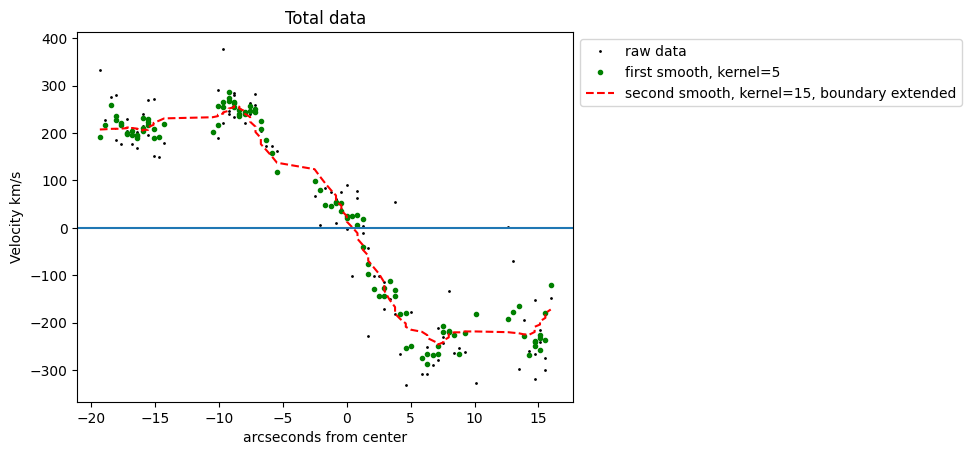

In [40]:
pix_to_arc = 4.2e-1 # arcsecond/pixel
arcs = pix_to_arc*totality_ind
plt.plot(arcs,raw_correction/1000,'k.',markersize=2,label="raw data")
plt.plot(arcs,v_correction/1000,'g.',label="first smooth, kernel=5")
plt.plot(arcs,v_corr_smooth/1000,'r--',label="second smooth, kernel=15, boundary extended")
plt.axhline(0)
plt.xlabel("arcseconds from center")
plt.ylabel("Velocity km/s")
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Total data")
plt.show()

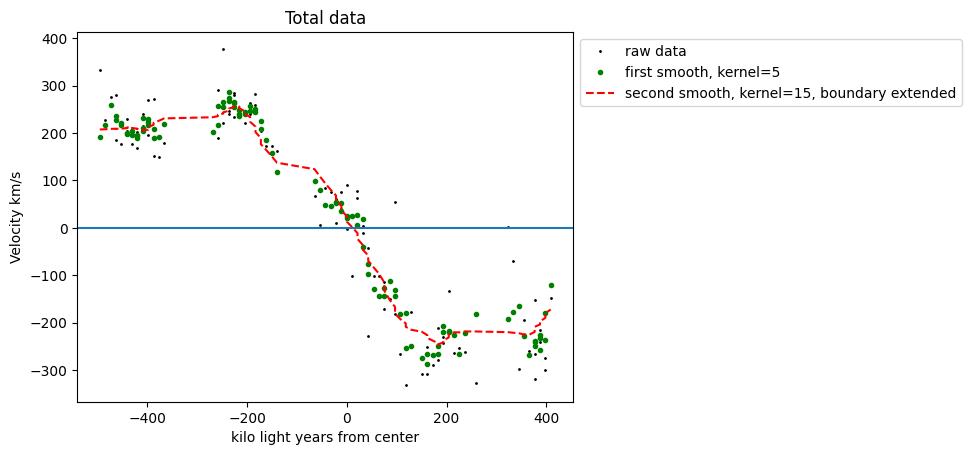

In [41]:
d = 5.2846e6 #kly, distance calculated by Ned Wright's cosmic calculator and z value of 0.0403
kly = d*np.tan(arcs*np.pi/60/60/180)
plt.plot(kly,raw_correction/1000,'k.',markersize=2,label="raw data")
plt.plot(kly,v_correction/1000,'g.',label="first smooth, kernel=5")
plt.plot(kly,v_corr_smooth/1000,'r--',label="second smooth, kernel=15, boundary extended")
plt.axhline(0)
plt.xlabel("kilo light years from center")
plt.ylabel("Velocity km/s")
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Total data")
plt.show()

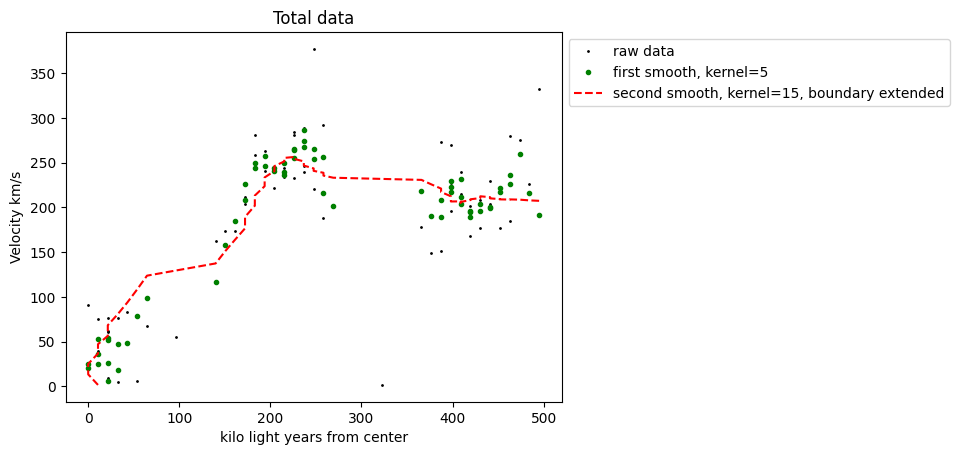

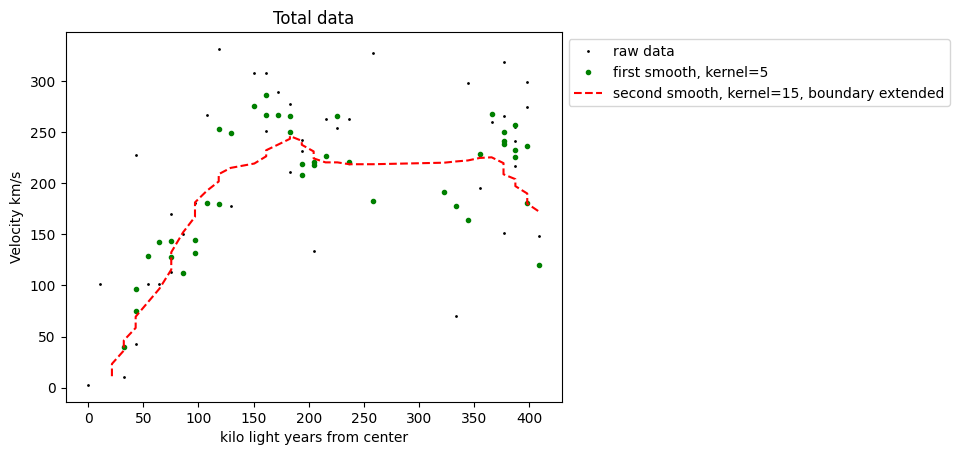

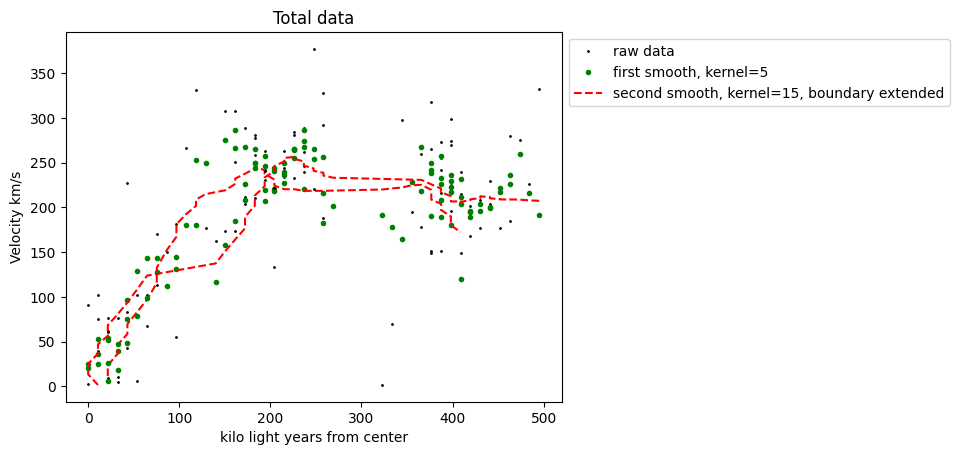

In [42]:
pos_mask_raw = raw_correction>=0
pos_mask_v = v_correction>=0
pos_mask_smooth = v_corr_smooth>=0
neg_mask_raw = pos_mask_raw==False
neg_mask_v = pos_mask_v==False
neg_mask_smooth = pos_mask_smooth==False

plt.plot(np.abs(kly[pos_mask_raw]),np.abs(raw_correction[pos_mask_raw]/1000),'k.',markersize=2,label="raw data")
plt.plot(np.abs(kly[pos_mask_v]),np.abs(v_correction[pos_mask_v]/1000),'g.',label="first smooth, kernel=5")
plt.plot(np.abs(kly[pos_mask_smooth]),np.abs(v_corr_smooth[pos_mask_smooth]/1000),'r--',label="second smooth, kernel=15, boundary extended")
plt.xlabel("kilo light years from center")
plt.ylabel("Velocity km/s")
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Total data")
plt.show()
plt.plot(np.abs(kly[neg_mask_raw]),np.abs(raw_correction[neg_mask_raw]/1000),'k.',markersize=2,label="raw data")
plt.plot(np.abs(kly[neg_mask_v]),np.abs(v_correction[neg_mask_v]/1000),'g.',label="first smooth, kernel=5")
plt.plot(np.abs(kly[neg_mask_smooth]),np.abs(v_corr_smooth[neg_mask_smooth]/1000),'r--',label="second smooth, kernel=15, boundary extended")
plt.xlabel("kilo light years from center")
plt.ylabel("Velocity km/s")
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Total data")
plt.show()
plt.plot(np.abs(kly[neg_mask_raw]),np.abs(raw_correction[neg_mask_raw]/1000),'k.',markersize=2,label="raw data")
plt.plot(np.abs(kly[neg_mask_v]),np.abs(v_correction[neg_mask_v]/1000),'g.',label="first smooth, kernel=5")
plt.plot(np.abs(kly[neg_mask_smooth]),np.abs(v_corr_smooth[neg_mask_smooth]/1000),'r--',label="second smooth, kernel=15, boundary extended")
plt.plot(np.abs(kly[pos_mask_raw]),np.abs(raw_correction[pos_mask_raw]/1000),'k.',markersize=2)
plt.plot(np.abs(kly[pos_mask_v]),np.abs(v_correction[pos_mask_v]/1000),'g.')
plt.plot(np.abs(kly[pos_mask_smooth]),np.abs(v_corr_smooth[pos_mask_smooth]/1000),'r--')
plt.xlabel("kilo light years from center")
plt.ylabel("Velocity km/s")
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Total data")
plt.show()

### Experimental

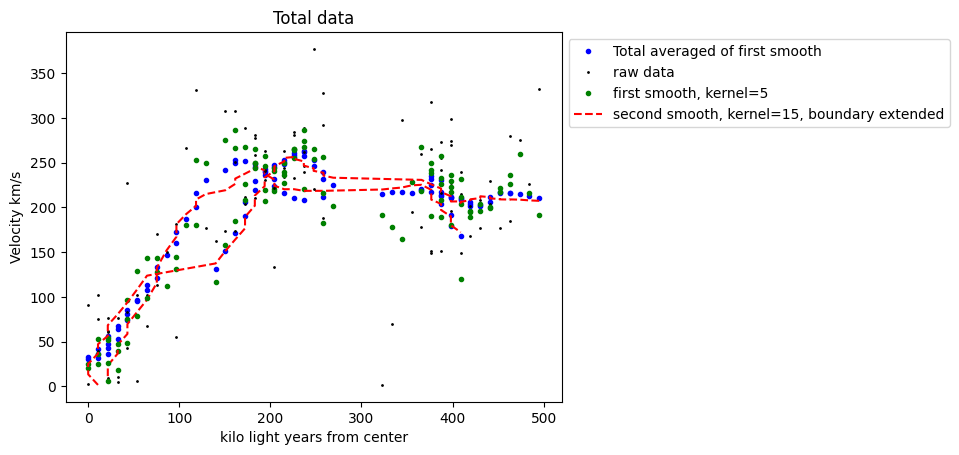

In [43]:
abs_indeces = np.concatenate((np.abs(kly[pos_mask_v]),np.abs(kly[neg_mask_v])),axis=None)
abs_values = np.concatenate((np.abs(v_correction[pos_mask_v]),np.abs(v_correction[neg_mask_v])),axis=None)
abs_values = convolve(abs_values,Box1DKernel(10),boundary='extend')
sorter_electric_bugaloo = np.argsort(abs_indeces)
plt.plot(abs_indeces[sorter_electric_bugaloo],abs_values[sorter_electric_bugaloo]/1000,'b.',label="Total averaged of first smooth")
plt.plot(np.abs(kly[neg_mask_raw]),np.abs(raw_correction[neg_mask_raw]/1000),'k.',markersize=2,label="raw data")
plt.plot(np.abs(kly[neg_mask_v]),np.abs(v_correction[neg_mask_v]/1000),'g.',label="first smooth, kernel=5")
plt.plot(np.abs(kly[neg_mask_smooth]),np.abs(v_corr_smooth[neg_mask_smooth]/1000),'r--',label="second smooth, kernel=15, boundary extended")
plt.plot(np.abs(kly[pos_mask_raw]),np.abs(raw_correction[pos_mask_raw]/1000),'k.',markersize=2)
plt.plot(np.abs(kly[pos_mask_v]),np.abs(v_correction[pos_mask_v]/1000),'g.')
plt.plot(np.abs(kly[pos_mask_smooth]),np.abs(v_corr_smooth[pos_mask_smooth]/1000),'r--')
plt.xlabel("kilo light years from center")
plt.ylabel("Velocity km/s")
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Total data")
plt.show();

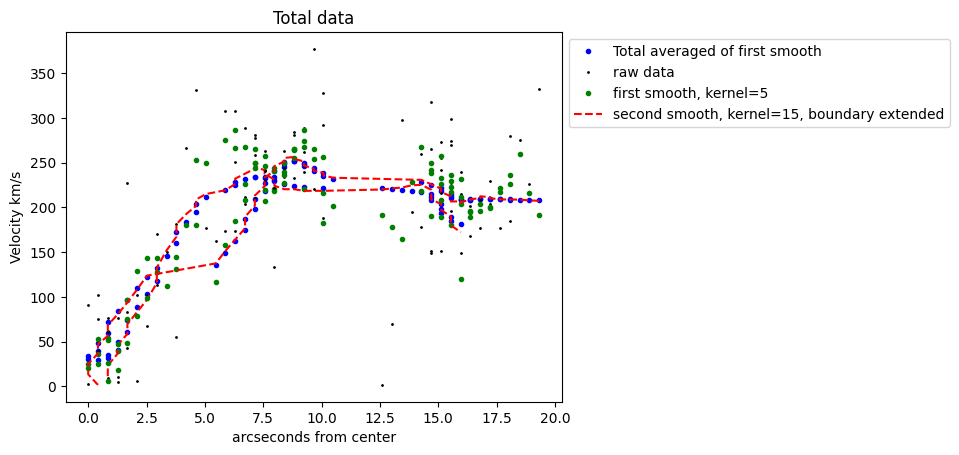

In [44]:
abs_indeces = np.concatenate((np.abs(arcs[pos_mask_v]),np.abs(arcs[neg_mask_v])),axis=None)
abs_values = np.concatenate((np.abs(v_corr_smooth[pos_mask_v]),np.abs(v_corr_smooth[neg_mask_v])),axis=None)
abs_values = convolve(abs_values,Box1DKernel(10),boundary='extend')
sorter_electric_bugaloo = np.argsort(abs_indeces)
plt.plot(abs_indeces[sorter_electric_bugaloo],abs_values[sorter_electric_bugaloo]/1000,'b.',label="Total averaged of first smooth")
plt.plot(np.abs(arcs[neg_mask_raw]),np.abs(raw_correction[neg_mask_raw]/1000),'k.',markersize=2,label="raw data")
plt.plot(np.abs(arcs[neg_mask_v]),np.abs(v_correction[neg_mask_v]/1000),'g.',label="first smooth, kernel=5")
plt.plot(np.abs(arcs[neg_mask_smooth]),np.abs(v_corr_smooth[neg_mask_smooth]/1000),'r--',label="second smooth, kernel=15, boundary extended")
plt.plot(np.abs(arcs[pos_mask_raw]),np.abs(raw_correction[pos_mask_raw]/1000),'k.',markersize=2)
plt.plot(np.abs(arcs[pos_mask_v]),np.abs(v_correction[pos_mask_v]/1000),'g.')
plt.plot(np.abs(arcs[pos_mask_smooth]),np.abs(v_corr_smooth[pos_mask_smooth]/1000),'r--')
plt.xlabel("arcseconds from center")
plt.ylabel("Velocity km/s")
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Total data")
plt.show();

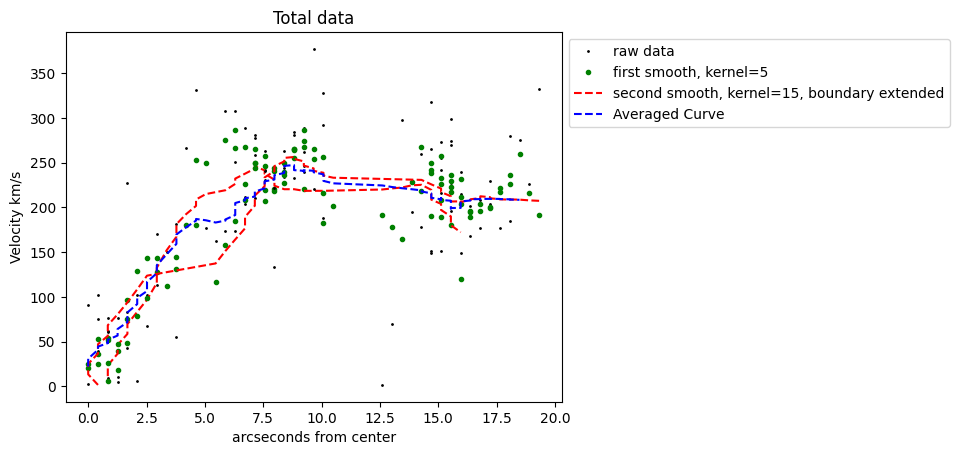

In [45]:
abs_values_electric_bugaloo = convolve(abs_values[sorter_electric_bugaloo],Box1DKernel(5),boundary="extend")
abs_values_electric_bugaloo = convolve(abs_values_electric_bugaloo,Box1DKernel(5))
plt.plot(np.abs(arcs[neg_mask_raw]),np.abs(raw_correction[neg_mask_raw]/1000),'k.',markersize=2,label="raw data")
plt.plot(np.abs(arcs[neg_mask_v]),np.abs(v_correction[neg_mask_v]/1000),'g.',label="first smooth, kernel=5")
plt.plot(np.abs(arcs[neg_mask_smooth]),np.abs(v_corr_smooth[neg_mask_smooth]/1000),'r--',label="second smooth, kernel=15, boundary extended")
plt.plot(np.abs(arcs[pos_mask_raw]),np.abs(raw_correction[pos_mask_raw]/1000),'k.',markersize=2)
plt.plot(np.abs(arcs[pos_mask_v]),np.abs(v_correction[pos_mask_v]/1000),'g.')
plt.plot(np.abs(arcs[pos_mask_smooth]),np.abs(v_corr_smooth[pos_mask_smooth]/1000),'r--')
plt.plot(abs_indeces[sorter_electric_bugaloo][:-2],abs_values_electric_bugaloo[:-2]/1000,'b--',label="Averaged Curve")
plt.xlabel("arcseconds from center")
plt.ylabel("Velocity km/s")
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Total data")
plt.show();

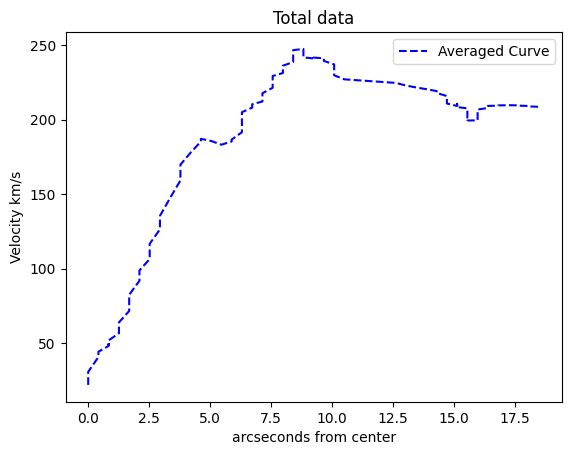

In [46]:
plt.plot(abs_indeces[sorter_electric_bugaloo][:-2],abs_values_electric_bugaloo[:-2]/1000,'b--',label="Averaged Curve")
plt.xlabel("arcseconds from center")
plt.ylabel("Velocity km/s")
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Total data")
plt.show();

$$v=\sqrt{\frac{GM}{r}}$$

$$\frac{v^2*r}{G} = M_r$$

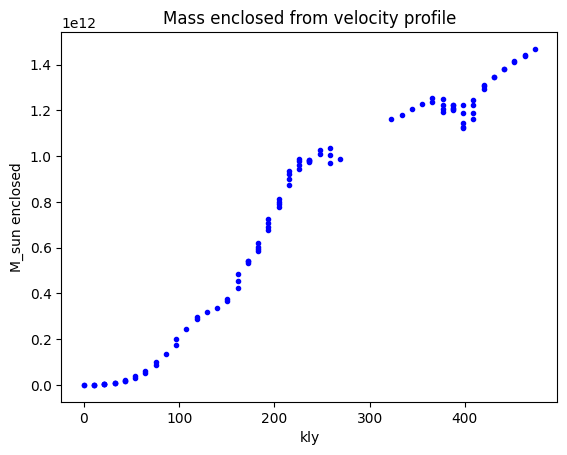

In [47]:
d_to_gal = 5.2846e6 #kly, distance calculated by Ned Wright's cosmic calculator and z value of 0.0403
kly_to_m = 9460730472580044e3 # kilo light years to meters
r_conv = d_to_gal*np.tan(abs_indeces[sorter_electric_bugaloo][:-2]*np.pi/60/60/180)

v = abs_values_electric_bugaloo[:-2]
r = r_conv*kly_to_m
G = 6.67e-11
M_dark = v**2*r/G

M_sun = 1.9891e30 # mass of sun
plt.plot(r_conv,M_dark/M_sun,'b.')
plt.ylabel("M_sun enclosed")
plt.xlabel('kly')
plt.title('Mass enclosed from velocity profile');
# plt.grid()

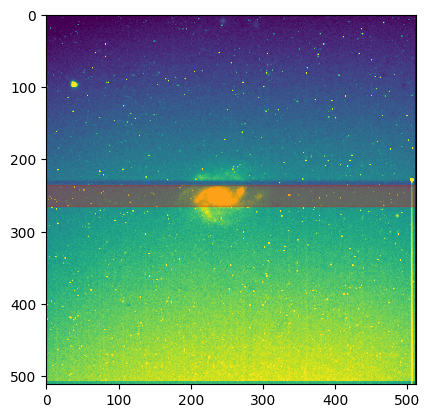

In [48]:
light_galaxy = fits.open("/Users/Kalvyn/Desktop/Obs2/APO_Data/dcam/d0060.fits")
l_gal = light_galaxy[0].data
plt.imshow(l_gal,vmin=np.percentile(l_gal,1),vmax=np.percentile(l_gal,99))
plt.axhspan(235,265,color="red",alpha=0.3)

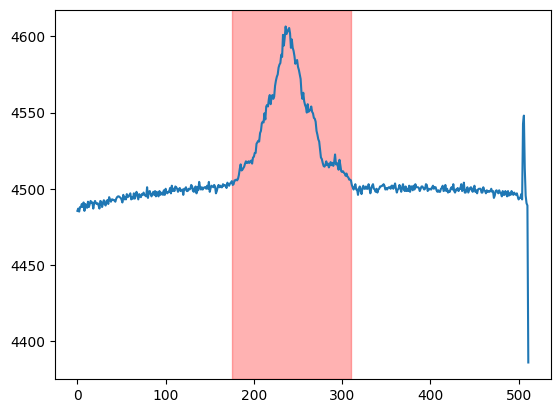

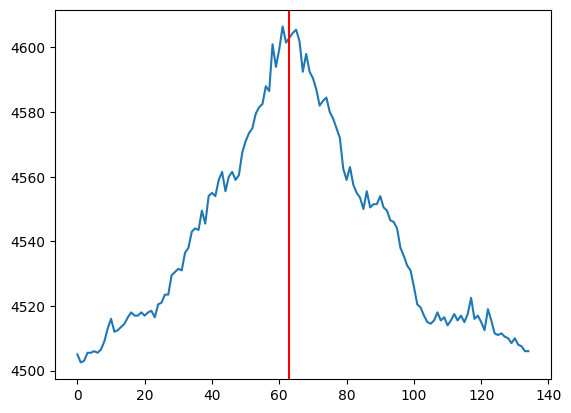

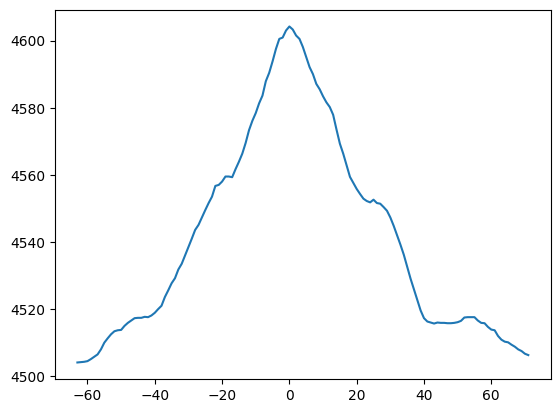

In [49]:
plt.plot(np.median(l_gal[235:265,:],axis=0))
selection = np.median(l_gal[235:265,:],axis=0)
plt.axvspan(175,310,color="red",alpha=.3)
plt.show()
plt.plot(selection[175:310]);
selection = selection[175:310]
selection = convolve(selection, Box1DKernel(5),boundary='extend')
arange = np.arange(len(selection))
arange -= np.argmax(selection)
plt.axvline(np.argmax(selection),color="red")
plt.show()
plt.plot(arange,selection);

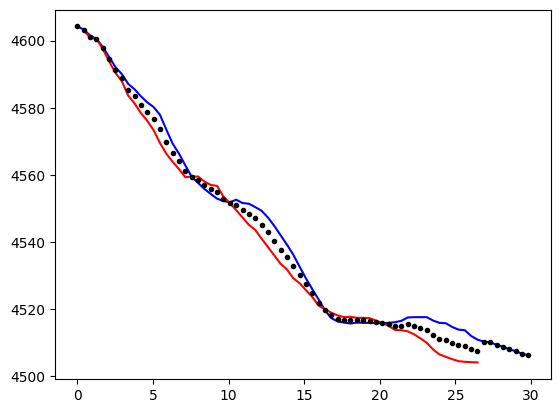

In [60]:
mask = arange>=0
neg_mask = mask == False
folded = np.concatenate((selection[mask],selection[neg_mask]),axis=None)
folded_ind = np.concatenate((arange[mask],np.abs(arange[neg_mask])),axis=None)
plt.plot(arange[mask]*pix_to_arc,selection[mask],color="Blue")
plt.plot(np.abs(arange[neg_mask])*pix_to_arc,np.abs(selection[neg_mask]),color="Red")
# plt.plot(folded_ind,folded,'g.')
sorter_bonkers = np.argsort(folded_ind)
folded = folded[sorter_bonkers]
folded_ind = folded_ind[sorter_bonkers]
folded_ind = folded_ind*pix_to_arc
smoothed_trilectric_trugaloo = convolve(folded,Box1DKernel(5),boundary="extend")
new_folded_ind = np.array([])
new_folded = np.array([])
prev = -1*pix_to_arc
for i in range(len(folded_ind)):
    temp = np.where(folded_ind==folded_ind[i])[0]
    if((len(temp)>0) and (folded_ind[i]!=prev)):
        new_folded = np.append(new_folded, np.median(folded[temp]))
        new_folded_ind = np.append(new_folded_ind, np.median(folded_ind[temp]))
        prev = folded_ind[i]
    if((len(temp)==1) and (folded_ind[i]!=prev)):
        new_folded = np.append(new_folded,folded[i])
        new_folded_ind = np.append(new_folded_ind,folded_ind[i])
# plt.plot(folded_ind,smoothed_trilectric_trugaloo,'k.');
plt.plot(new_folded_ind,new_folded,'k.')

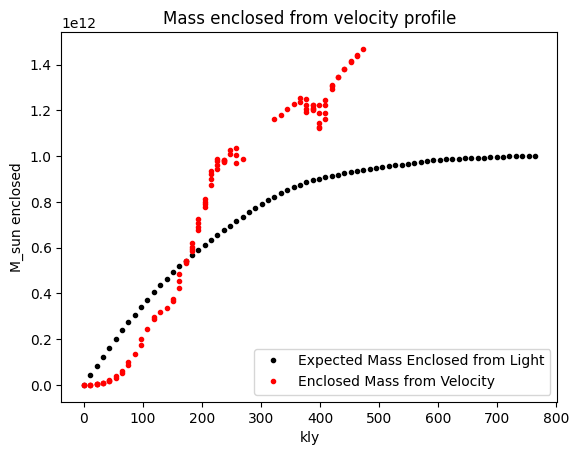

In [61]:
l_mass = np.array([])
# print(new_folded)
new_folded = (new_folded-np.min(new_folded))/(np.max(new_folded)-np.min(new_folded))
for i in range(len(new_folded)):
    if(i!=0):
        l_mass = np.append(l_mass,l_mass[i-1]+new_folded[i])
    elif(i==0):
        l_mass = np.append(l_mass,new_folded[i])
# print(l_mass)
l_mass = (l_mass-np.min(l_mass))/(np.max(l_mass)-np.min(l_mass))
new_folded_ind = d_to_gal*np.tan(new_folded_ind*np.pi/60/60/180)
plt.plot(new_folded_ind,l_mass*1e12,'k.',label="Expected Mass Enclosed from Light")
plt.plot(r_conv,M_dark/M_sun,'r.',label="Enclosed Mass from Velocity")
plt.ylabel("M_sun enclosed")
plt.xlabel('kly')
plt.title('Mass enclosed from velocity profile')
plt.legend();

In [ ]:
rho_0 = 
R_max = 
R_s = 
Dark_M_encl = 4*np.pi*rho_0*R_s**3*(np.log((R_s-R_max)/R_s)+R_max/(R_s+R_max))